# reqs

https://www.tensorflow.org/  
https://github.com/keras-team/keras  
http://playground.tensorflow.org/  

```
conda activate sandbox
conda install -c conda-forge tensorflow
conda install -c conda-forge keras
```

https://exerror.com/importerror-cannot-import-name-layernormalization-from-tensorflow-python-keras-layers-normalization/

```
conda remove keras
conda remove tensorflow

pip install tensorflow
```

`ERROR: Could not install packages due to an OSError: [Errno 2] Нет такого файла или каталога: '/home/bubulmet/miniconda3/envs/sandbox/lib/python3.8/site-packages/google_pasta-0.2.0.dist-info/METADATA'`

https://stackoverflow.com/a/62683232

```
pip install --upgrade --force-reinstall tensorflow
```

`ERROR: Cannot uninstall google-pasta 0.2.0, RECORD file not found. You might be able to recover from this via: 'pip install --force-reinstall --no-deps google-pasta==0.2.0'`

* пошел в /home/bubulmet/miniconda3
* сделал там поиск google-pasta, нашел 4 объекта в ./pkgs
* удалил, и снова:

```
pip install --upgrade --force-reinstall tensorflow
```

И то же самое:
`ERROR: Cannot uninstall google-pasta 0.2.0, RECORD file not found. You might be able to recover from this via: 'pip install --force-reinstall --no-deps google-pasta==0.2.0'`

Тогда сделал так:
```
pip uninstall tensorflow
conda deactivate

conda create --name tf_keras 
conda activate tf_keras
conda install tensorflow
```
> Keras comes packaged with TensorFlow 2 as tensorflow.keras. To start using Keras, simply install TensorFlow 2. 

Ну и затем:
```
conda activate tf_keras

conda install ipykernel
conda install pandas
conda install pillow
conda install -c conda-forge matplotlib
conda install -c conda-forge tensorflow-datasets
conda install -c conda-forge ipywidgets
```

In [1]:
# !python --version

Python 3.9.7


In [3]:
# import tensorflow as tf
# tf.__version__

'2.6.0'

In [6]:
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [5]:
# from tensorflow.keras.models import Sequential

# theory

Если у всех изображений датасета размер равен 1920×1080 пикселей, то каждое изображение описывается 2 073 600 признаками: 1920 умножаем на 1080. Когда признаков много, классические алгоритмы (например, градиентный бустинг) с обучением не справляются.
Рассмотрим другой пример. Теперь нашим датасетом будут текстовые описания товаров в интернет-магазине, а определить нужно категорию, к которой принадлежит товар.
Преобразовать текст в численный формат поможет техника мешка слов. Сначала для каждого слова создаётся новый столбец. Если слово есть в описании товара, в столбце ставится 1, если нет — 0. Если в описании 10–20 слов, логистическую регрессию на преобразованном датасете обучить можно. Когда слов сотни, этот способ кодирования уже не работает. Но избавившись от порядка следования слов, можно потерять и смысл текста. Если же применить n-граммы, признаков станет ещё больше: классические методы снова не справятся.

Разберём, что объединяет изображения и тексты:
* Информация в них избыточна. Например, пиксели фона фотографии не так значимы при определении возраста, как морщины или седина. А предлоги и союзы не столь важны для определения смысла текста, как существительные и глаголы. Справиться с большим числом признаков помогут нейронные сети.
* Соседние признаки связаны друг с другом. Зачастую соседние пиксели на изображении принадлежат одному объекту, а рядом стоящие слова в предложении связаны по смыслу. Если перемешать столбцы в табличных данных, их смысл не поменяется; если пиксели в изображении — будет шум, с которым уже ничего сделать нельзя. Учитывать порядок признаков умеют нейронные сети.

https://habr.com/ru/post/454034/

# init

In [1]:
import pandas as pd
import numpy as np

from PIL import Image

from tensorflow import keras
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

In [12]:
PREFIX = 'https://code.s3.yandex.net' # PREFIX + 

# linear/logistic regression with Keras

`model = keras.models.Sequential()` - это, видимо, в отличии от _рекуррентных_ сетей. Может и ещё каких-то. Тут `.Sequential()`, _последовательная_.  

`keras.layers.Dense()` - _полносвязный_ слой ("густой", если прямо переводить _Dense_; "fully connected", если прямо переводить _полносвязный_)

**Binary Cross-Entropy, BCE** (англ. «бинарная кросс-энтропия») - $-\log{p}$, где $p$ - это вероятность ___правильного ответа___ (т.е. если $y\_true=0$, то $p=P(0)$; а если $y\_true=1$, то $p=P(1)$)

In [17]:
data_train = pd.read_csv(PREFIX + '/datasets/train_data_n.csv')
features_train = data_train.drop('target', axis=1)
target_train = data_train['target']

data_valid = pd.read_csv(PREFIX + '/datasets/test_data_n.csv')
features_valid = data_valid.drop('target', axis=1)
target_valid = data_valid['target']

In [19]:
# LINEAR REGRESSION

# создаём модель
model = keras.models.Sequential()

# указываем, как устроена нейронная сеть
model.add(
    keras.layers.Dense(
        units=1, 
        input_dim=features.shape[1]
    )
)

# указываем, как обучается нейронная сеть
model.compile(
    loss='mean_squared_error', 
    optimizer='sgd'
)

# обучаем модель
model.fit(
    features_train, 
    target_train, 
    verbose=1, 
    #
    epochs=5,
    validation_data=(
        features_valid, 
        target_valid
    )
);

Epoch 1/5
32/32 [==============================] - 0s 4ms/step - loss: 9.4011 - val_loss: 7.2629
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 7.2308 - val_loss: 6.7616
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 6.6953 - val_loss: 6.7553
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 6.5431 - val_loss: 6.7736
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 6.5170 - val_loss: 6.7779


In [28]:
# LOGISTIC REGRESSION

binary_target_train = (target_train > target_train.median()).astype(int)
binary_target_valid = (target_valid > target_valid.median()).astype(int)

# создаём модель
model = keras.models.Sequential()

# указываем, как устроена нейронная сеть
model.add(
    keras.layers.Dense(
        units=1, 
        input_dim=features.shape[1],
        activation='sigmoid'
    )
)

# указываем, как обучается нейронная сеть
model.compile(
    loss='binary_crossentropy', 
    optimizer='sgd',
    metrics=['acc']
)

# обучаем модель
model.fit(
    features_train, 
    binary_target_train, 
    verbose=1, 
    #
    epochs=5,
    validation_data=(
        features_valid, 
        binary_target_valid
    )
);

Epoch 1/5
32/32 [==============================] - 0s 6ms/step - loss: 0.8976 - acc: 0.5130 - val_loss: 0.9415 - val_acc: 0.4760
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.8670 - acc: 0.5210 - val_loss: 0.9123 - val_acc: 0.4760
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.8383 - acc: 0.5300 - val_loss: 0.8869 - val_acc: 0.4860
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.8123 - acc: 0.5430 - val_loss: 0.8636 - val_acc: 0.4900
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7892 - acc: 0.5510 - val_loss: 0.8432 - val_acc: 0.4960


# Многослойные полносвязные сети

С увеличением количества слоёв обучение ухудшается. Чем больше слоёв в сети, тем меньше сигнала от входа доходит до выхода сети. Это называется затуханием сигнала (англ. vanishing signal). Причина затухания кроется в сигмоиде, преобразующей большие значения в маленькие по многу раз.  
Чтобы избавиться от затухания сигнала, можно выбрать другую функцию активации. Например, ReLU (англ. Rectified Linear Unit, «выпрямленное линейное преобразование»).  

In [27]:
# создаём модель
model = keras.models.Sequential()

# указываем, как устроена нейронная сеть
model.add(
    keras.layers.Dense(
        units=5, 
        activation='relu',
        input_dim=features.shape[1]
        
    )
)
model.add(
    keras.layers.Dense(
        units=10, 
        activation='relu'
    )
)
model.add(
    keras.layers.Dense(
        units=1
    )
)

# указываем, как обучается нейронная сеть
model.compile(
    loss='mean_squared_error', 
    optimizer='sgd'
)

# обучаем модель
model.fit(
    features_train, 
    target_train, 
    verbose=1, 
    #
    epochs=5,
    validation_data=(
        features_valid, 
        target_valid
    )
);

Epoch 1/5
32/32 [==============================] - 1s 10ms/step - loss: 8.5266 - val_loss: 7.2053
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 7.7357 - val_loss: 7.1670
Epoch 3/5
32/32 [==============================] - 0s 9ms/step - loss: 7.4405 - val_loss: 7.0083
Epoch 4/5
32/32 [==============================] - 0s 8ms/step - loss: 7.1165 - val_loss: 6.9650
Epoch 5/5
32/32 [==============================] - 0s 6ms/step - loss: 6.7680 - val_loss: 7.0636


# Работа с изображениями

Изображения — это набор чисел. Если изображение чёрно-белое, то в каждом пикселе хранится число от 0 (чёрный) до 255 (белый).  

Юзаем библиотеку **PIL** (англ. Python Imaging Library, «библиотека изображений Python»), точнее её форк [pillow](https://pillow.readthedocs.io/en/stable/index.html)

In [63]:
image = Image.open('./files/flower.jpeg')

img_array = np.array(image)

img_array.shape

(183, 275, 3)

Тут не двумерный массив. Но мы можем обрезать :)

In [64]:
black_and_white_array = img_array[:,:,0]

## Чёрно-белые картинки

In [71]:
black_and_white_array.shape

(183, 275)

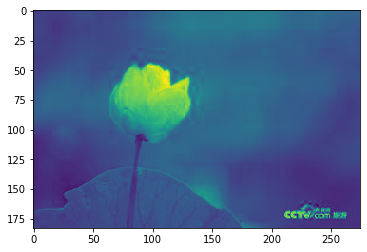

In [65]:
plt.imshow(black_and_white_array);

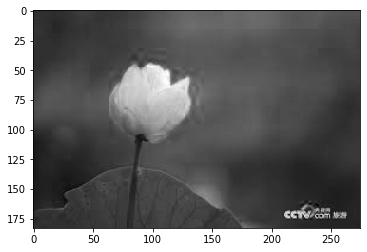

In [66]:
plt.imshow(black_and_white_array, cmap='gray');

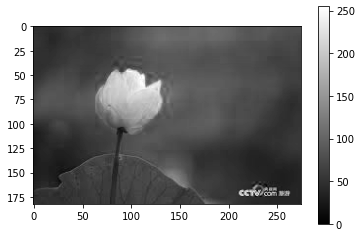

In [67]:
plt.imshow(black_and_white_array, cmap='gray')
plt.colorbar()
plt.show();

In [68]:
print(black_and_white_array)

[[47 47 47 ... 80 80 80]
 [47 47 47 ... 80 80 80]
 [47 47 47 ... 80 80 80]
 ...
 [51 50 50 ... 34 34 34]
 [53 52 52 ... 34 34 34]
 [55 54 53 ... 34 34 34]]


Чтобы нейронные сети обучались лучше, обычно на вход им передают изображения в диапазоне от 0 до 1.  

Можно просто поделить на 255:

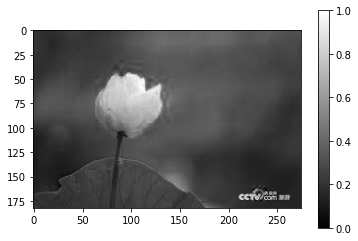

In [69]:
black_and_white_array = black_and_white_array / 255.

plt.imshow(black_and_white_array, cmap='gray')
plt.colorbar()
plt.show();

## Цветные картинки

Цветные, или RGB-изображения, состоят из трёх каналов: красного (англ. red), зелёного (англ. green) и синего (англ. blue). По сути такие изображения — это трёхмерные массивы, в ячейках которых могут быть целые числа от 0 до 255.  
В трёхмерном массиве, полученном из изображения, всё так же: первая координата — это номер строки, вторая — номер столбца. Ещё добавляется третья координата — номер канала.  
То есть трёхмерный массив — это всё тот же двумерный массив, аналогичный чёрно-белому изображению. Только в каждом пикселе этого массива хранятся три числа: яркость красного, зелёного и синего каналов.

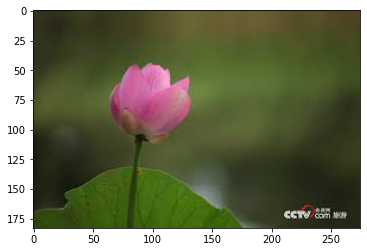

In [70]:
plt.imshow(img_array);

In [72]:
img_array.shape

(183, 275, 3)

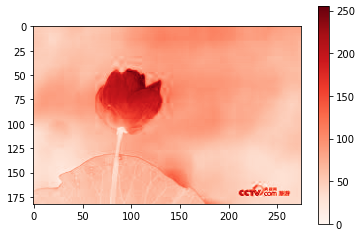

In [104]:
# отдельный канал
red_channel = img_array[:, :, 0]

plt.imshow(red_channel, cmap='Reds')
plt.colorbar()
plt.show();

Про `cmap`'ы (color maps): https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html

# Многоклассовая классификация

Разберём, что такое многоклассовая классификация (англ. multi-class classification) и как она устроена.  
Получили полносвязную сеть, в выходном слое которой не один, а три нейрона. Каждый нейрон отвечает за свой класс.  
В нашем примере классов три, но вычисление функции потерь не поменяется. Только называться она будет CE (англ. cross-entropy, «кросс-энтропия»)

$CE = -\log{p}$  
, где $p$ — вероятность правильного класса, которую вернула нейросеть.  

Функция активации, которая нам подойдёт, называется SoftMax (англ. «мягкий максимум»). Она принимает несколько выходов сети и возвращает вероятности, сумма которых равна единице.  
Если классов будет больше трёх, нейронов в выходном слое будет столько же, сколько классов, а все их выходы передадим в SoftMax.  
Вероятности из SoftMax на этапе обучения перейдут в кросс-энтропию, которая и посчитает ошибку. Функция потерь будет минимизирована методом градиентного спуска. Ему достаточно, чтобы у функции была производная по всем параметрам: весам и смещению нейронной сети.  

> **[Датасет с фруктами!](https://disk.yandex.ru/d/NcxKPiWyphNJaA)** (а, ну я ещё себе на Я.Диск скопировал, там в Загрузках, `fruits.tgz`)

Возьмем датку ([Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)) из [tensorflow-datasets](https://www.tensorflow.org/datasets/) (пример брал [отсюда](https://habr.com/ru/post/454034/)):

In [81]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True, shuffle_files=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print('Количество тренировочных экземпляров: {}'.format(num_train_examples))
print('Количество тестовых экземпляров: {}'.format(num_test_examples))

Количество тренировочных экземпляров: 60000
Количество тестовых экземпляров: 10000


In [97]:
class_names = [
    'Футболка / топ', 
    "Шорты", 
    "Свитер", 
    "Платье",
    "Плащ", 
    "Сандали", 
    "Рубашка", 
    "Кроссовок", 
    "Сумка",
    "Ботинок"
]

In [98]:
for image, label in test_dataset.take(1):
    break
    
image = image.numpy()
label = label.numpy()

In [100]:
image.shape

(28, 28, 1)

Последнее измерение - 1. Значит монохромная картинка, не цветная (а то бы было три цветовых канала: Red, Green и Blue)

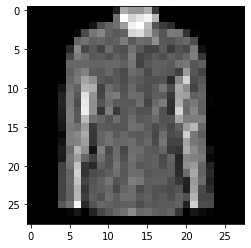

In [102]:
plt.imshow(image, cmap='gray');

In [103]:
class_names[label]

'Рубашка'

In [105]:
a = 3+\ 
5

SyntaxError: unexpected character after line continuation character (1621926313.py, line 1)

In [106]:
PREFIX + '/datasets/fruits_small/Banana/Banana027.png'

'https://code.s3.yandex.net/datasets/fruits_small/Banana/Banana027.png'

In [3]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D


from tensorflow.keras.optimizers import Adam


In [11]:
input_shape = (150, 150, 3)

model = Sequential()
optimizer=Adam(lr=0.001)

model.add(Conv2D(6, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(AvgPool2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), padding='valid', activation='relu'))
model.add(AvgPool2D(pool_size=(2, 2)))
model.add(Flatten())

#model.add(Dense(100, input_shape=input_shape, activation='relu'))
#model.add(Dense(50, activation='relu'))
#model.add(Dense(20, activation='relu'))
model.add(Dense(12, activation='softmax'))

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',
              metrics=['acc'])